In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import cluster, datasets

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Método do Cotovelo para Determinação do Número de Clusters (K-Means)

In [4]:
# Carregar dados do Excel
data = pd.read_excel('dh fractal.xlsx', sheet_name = "Sheet1")

# Selecionar as colunas relevantes - tabela com os valores de neurito CTL
X = data[['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

In [5]:
# Função para calcular a soma dos quadrados dentro dos clusters
def calculate_wcss(data):
    wcss = []
    for n in range(1, 10):
        kmeans = KMeans(n_clusters=n, init='k-means++')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Função para determinar o número ideal de clusters
def optimal_number_of_clusters(wcss):
    differences = []
    for i in range(len(wcss)-1):
        differences.append(wcss[i] - wcss[i+1])
    return differences.index(max(differences)) + 1


In [9]:
# Calcular a WCSS para diferentes números de clusters
wcss = calculate_wcss(X)

# Determinar o número ideal de clusters
n = optimal_number_of_clusters(wcss)

# Executar o K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=n, init='k-means++')
clusters = kmeans.fit_predict(X)

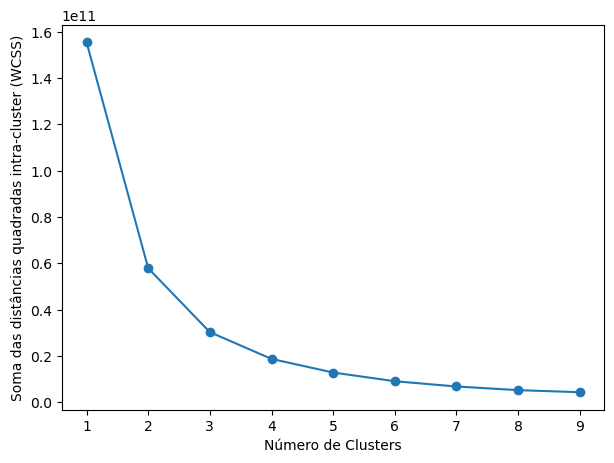

In [11]:
# Plotar a soma das distâncias quadradas intra-cluster (WCSS)
plt.figure(figsize=(7, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das distâncias quadradas intra-cluster (WCSS)')

# Salvar a figura
#plt.savefig('Número de Clusters.png') 

plt.show()

# Comparaçao entre control, H2O2, EtOH, DH vehicle, DH 2-APB

In [12]:
# Separar os dados de controle e tratamento
data_Control = data[data['grupo'] == 'Control']
data_H2O2 = data[data['grupo'] == 'H2O2']
data_EtOH = data[data['grupo'] == 'EtOH']
data_DHvehicle = data[data['grupo'] == 'DH vehicle']
data_DH2APB = data[data['grupo'] == 'DH 2-APB']

# Selecionar as colunas relevantes para controle
X_Control = data_Control [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_H2O2 = data_H2O2 [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_EtOH = data_EtOH [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_DHvehicle = data_DHvehicle [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_DH2APB = data_DH2APB [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

In [20]:
# Normalizar os dados para controle...
X_Control = StandardScaler().fit_transform(X_Control)

X_H2O2 = StandardScaler().fit_transform(X_H2O2)

X_EtOH = StandardScaler().fit_transform(X_EtOH)

X_DHvehicle = StandardScaler().fit_transform(X_DHvehicle)

X_DH2APB = StandardScaler().fit_transform(X_DH2APB)

# Redução de dimensionalidade com PCA para controle...
pca_Control = PCA(n_components=20)
X_pca_Control = pca_Control.fit_transform(X_Control)

pca_H2O2 = PCA(n_components=20)
X_pca_H2O2 = pca_H2O2.fit_transform(X_H2O2)

pca_EtOH = PCA(n_components=20)
X_pca_EtOH = pca_EtOH.fit_transform(X_EtOH)

pca_DHvehicle = PCA(n_components=20)
X_pca_DHvehicle = pca_DHvehicle.fit_transform(X_DHvehicle)

pca_DH2APB = PCA(n_components=20)
X_pca_DH2APB = pca_DH2APB.fit_transform(X_DH2APB)

# Unir os dados reduzidos de controle e tratamento
X_pca = np.concatenate((X_pca_Control, X_pca_H2O2, X_pca_EtOH, X_pca_DHvehicle, X_pca_DH2APB))

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering (linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

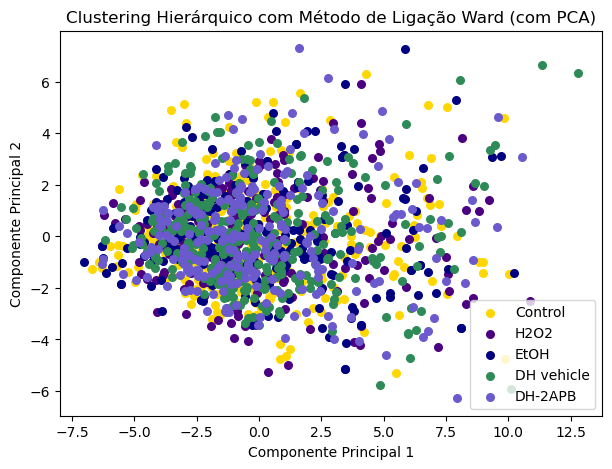

In [21]:
# Plotar os resultados do clustering para controle e tratamento
plt.figure(figsize=(7, 5))

# Plotar os pontos
plt.scatter(X_pca_Control[:, 0], X_pca_Control[:, 1], color='gold', label='Control', s=30)

plt.scatter(X_pca_H2O2[:, 0], X_pca_H2O2[:, 1], color='indigo', label='H2O2', s=30)

plt.scatter(X_pca_EtOH[:, 0], X_pca_EtOH[:, 1], color='navy', label='EtOH', s=30)

plt.scatter(X_pca_DHvehicle[:, 0], X_pca_DHvehicle[:, 1], color='seagreen', label='DH vehicle', s=30)

plt.scatter(X_pca_DH2APB[:, 0], X_pca_DH2APB[:, 1], color='slateblue', label='DH-2APB', s=30)

plt.title('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Salvar a figura
#plt.savefig('Clustering Hierárquico veiculo vs ata.png')

plt.show()
 

## Plotar só alguns valores

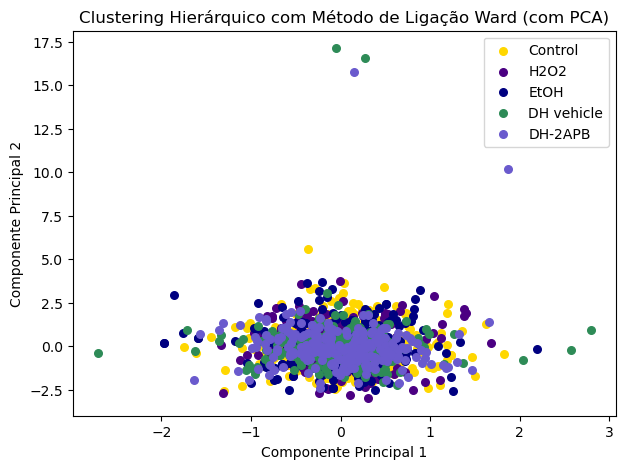

In [42]:
# Plotar os resultados do clustering para controle e tratamento
plt.figure(figsize=(7, 5))

# Plotar os pontos
plt.scatter(X_pca_Control[:, 6], X_pca_Control[:, 2], color='gold', label='Control', s=30)

plt.scatter(X_pca_H2O2[:, 6], X_pca_H2O2[:, 2], color='indigo', label='H2O2', s=30)

plt.scatter(X_pca_EtOH[:, 6], X_pca_EtOH[:, 2], color='navy', label='EtOH', s=30)

plt.scatter(X_pca_DHvehicle[:, 6], X_pca_DHvehicle[:, 2], color='seagreen', label='DH vehicle', s=30)

plt.scatter(X_pca_DH2APB[:, 6], X_pca_DH2APB[:, 2], color='slateblue', label='DH-2APB', s=30)

plt.title('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Salvar a figura
#plt.savefig('Clustering Hierárquico veiculo vs ata.png')

plt.show()

    Visualização de contorno: Você pode plotar os contornos dos clusters para ter uma ideia mais clara da distribuição dos dados em torno dos centroides.

    Visualização baseada em densidade: Usando métodos como o KDE (Estimativa de Densidade de Kernel), você pode criar visualizações que destacam as regiões de alta densidade dos dados, o que pode ser útil para identificar agrupamentos.

    Visualização hierárquica: Para dados com muitos clusters ou uma estrutura hierárquica, você pode representar a árvore de clusters ou dendrograma para visualizar como os clusters estão relacionados entre si.

    Mapas de calor de proximidade: Usando medidas de proximidade entre os pontos, você pode criar mapas de calor que mostram a proximidade entre diferentes pontos e destacam regiões densas ou clusters.

    Visualizações interativas: Ferramentas de visualização interativa, como gráficos de dispersão interativos ou visualizações de redução de dimensionalidade, podem permitir explorar os dados de forma mais dinâmica e identificar padrões de cluster mais facilmente.